In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [22]:
if not os.path.exists("stats"):
    os.mkdir("stats")

if not os.path.exists("plots"):
    os.mkdir("plots")

# Data Preparation and Cleaning

1.   Load the file using Pandas

2.   Look at some information about the data & the columns
3.   Fix any missing or incorrect values









Load the data

In [23]:
df = pd.read_csv('IFR_Raw_Sample_Data.csv')

Clean the data for columns which consist of all null values

In [24]:
df = df[['wtcurr_lbs', 
         'wtcurr_kg', 
         'obreak_date', 
         'datebone', 
         'PatientAge', 
         'PatientGender', 
         'parentbreak', 
         'smoke', 
         'oralster',
         'arthritis',
         'alcohol',
         'diabetes',
         'respdisease',
         'cancer',
         'DateSurveyed',
         'obreaK_wrist',
         'obreak_elbow',
         'obreak_shoulder',
         'obreak_spine',
         'obreak_pelvis',
         'obreak_hip',
         'obreak_femur',
         'obreak_tibfib',
         'obreak_clavicle',
         'obreak_obone']]

Create a column for weight in lbs for all patients has weight information.
0 means that patient has no weight information.

In [25]:
both_missing = df['wtcurr_lbs'].isnull() & df['wtcurr_kg'].isnull()

missing_lbs = df['wtcurr_lbs'].isnull() & ~df['wtcurr_kg'].isnull()

df.loc[missing_lbs, 'wtcurr_lbs'] = round(df.loc[missing_lbs, 'wtcurr_kg'] * 2.20462)

fill_value = 0
df['wtcurr_lbs'] = df['wtcurr_lbs'].fillna(fill_value).astype('int64')

df.drop(columns=['wtcurr_kg'], inplace=True)

IFR has 2 years time frame so we need to eliminate records exceeding this time frame.

In [26]:
obreak_date = pd.to_datetime(df['obreak_date'])
datebone = pd.to_datetime(df['datebone'])

df['date_difference'] = (datebone - obreak_date).dt.days

df_filtered = df[df['date_difference'] <= 730]

df_filtered = df_filtered.drop(columns=['date_difference'])

/var/folders/4c/gh2b2b651rddfwcxbp9zl5xc0000gv/T/ipykernel_67245/922402381.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  obreak_date = pd.to_datetime(df['obreak_date'])
/var/folders/4c/gh2b2b651rddfwcxbp9zl5xc0000gv/T/ipykernel_67245/922402381.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datebone = pd.to_datetime(df['datebone'])


#Exploratory Analysis and Visualization








# Age - Risk Factor

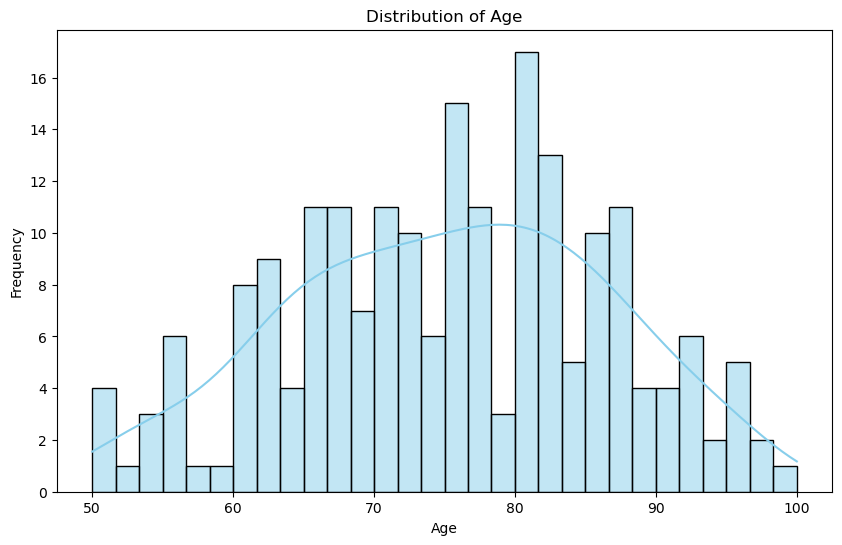

count    202.000000
mean      75.257426
std       11.233526
min       50.000000
25%       67.000000
50%       76.000000
75%       83.000000
max      100.000000
Name: PatientAge, dtype: float64

In [27]:
# Variables
column_name = 'PatientAge'
label_name = 'Age'
file_name = 'age'

# Statistics for the risk factor in filtered dataset for IFR to a txt file
risk_factor_stats = df_filtered[column_name].describe()
risk_factor_stats_str = risk_factor_stats.to_string()
file_path = f'stats/{file_name}_stats.txt'
with open(file_path, 'w') as file:
    file.write(risk_factor_stats_str)

# Visualization of Age risk factor in filtered dataset for IFR
plt.figure(figsize=(10, 6))

sns.histplot(df_filtered[column_name], bins=30, kde=True, color='skyblue', edgecolor='black')

plt.xlabel(label_name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {label_name}')

plt.savefig(f'plots/{file_name}_distribution.png')

plt.show()
risk_factor_stats

#Sex - Risk Factor

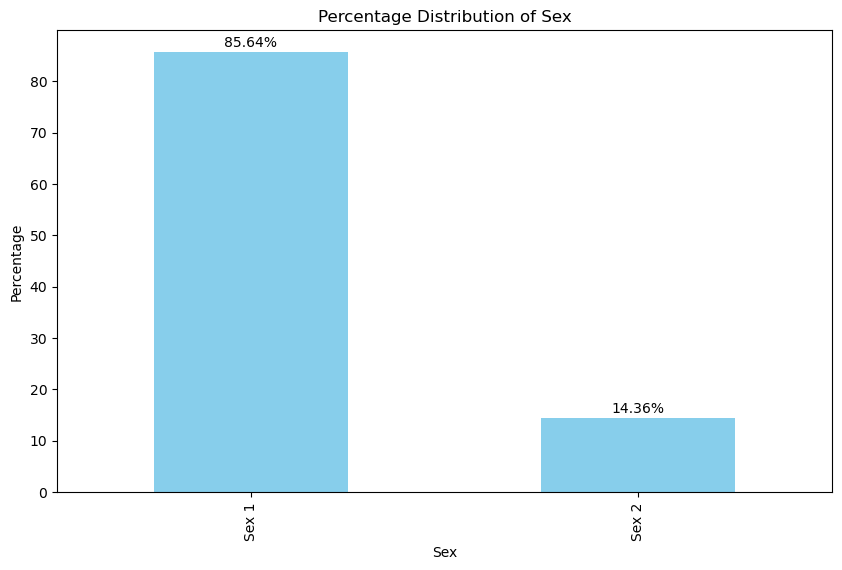

count    202.000000
mean       1.143564
std        0.351519
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: PatientGender, dtype: float64

In [29]:
# Variables
column_name = 'PatientGender'
label_name = 'Sex'
file_name = 'sex'

# Statistics for the risk factor in filtered dataset for IFR to a txt file
risk_factor_stats = df_filtered[column_name].describe()
risk_factor_stats_str = risk_factor_stats.to_string()
file_path = f'stats/{file_name}_stats.txt'
with open(file_path, 'w') as file:
    file.write(risk_factor_stats_str)

# Mapping values for visualization
mapping = {1: 'Sex 1', 2: 'Sex 2'}
specific_column = f'{column_name}_mapped'
df_filtered[specific_column] = df_filtered[column_name].map(mapping).fillna('Not Known')

# Visualization of the risk factor in filtered dataset for IFR
percentage_values = df_filtered[specific_column].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))

percentage_values.plot(kind='bar', color='skyblue')

plt.xlabel(f'{label_name}')
plt.ylabel('Percentage')
plt.title(f'Percentage Distribution of {label_name}')

for index, value in enumerate(percentage_values):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center', va='bottom')

plt.savefig(f'plots/{file_name}_percentage_distribution.png')

plt.show()

# Dropping column created for visualization
df_filtered = df_filtered.drop(specific_column, axis=1)

risk_factor_stats

#Weight - Risk Factor

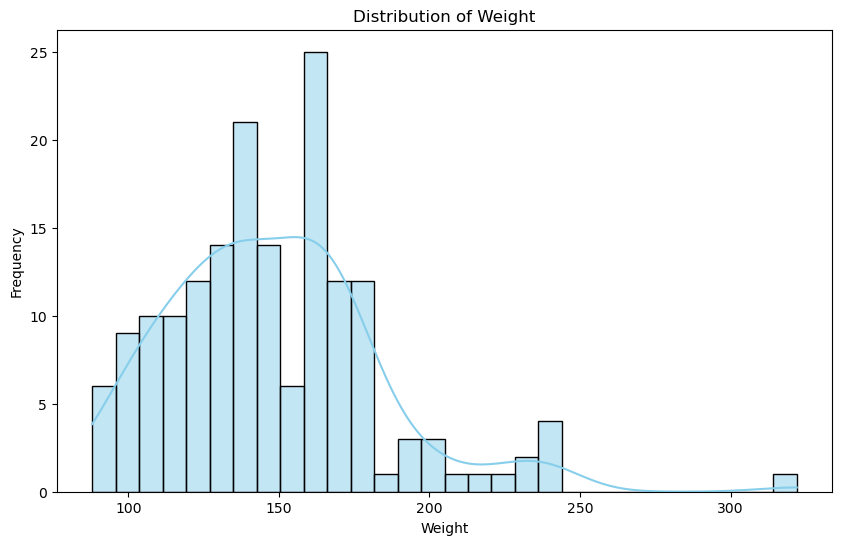

count    168.000000
mean     148.101190
std       35.591434
min       88.000000
25%      123.750000
50%      145.000000
75%      165.000000
max      322.000000
Name: wtcurr_lbs, dtype: float64

In [30]:
# Variables
column_name = 'wtcurr_lbs'
label_name = 'Weight'
file_name = 'weight'

df_filtered_knownwt = df_filtered[df_filtered[column_name] != 0]

# Statistics for the risk factor in filtered dataset for IFR to a txt file
risk_factor_stats = df_filtered_knownwt[column_name].describe()
risk_factor_stats_str = risk_factor_stats.to_string()
file_path = f'stats/{file_name}_stats.txt'
with open(file_path, 'w') as file:
    file.write(risk_factor_stats_str)

# Visualization of Age risk factor in filtered dataset for IFR
plt.figure(figsize=(10, 6))

sns.histplot(df_filtered_knownwt[column_name], bins=30, kde=True, color='skyblue', edgecolor='black')

plt.xlabel(label_name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {label_name}')

plt.savefig(f'plots/{file_name}_distribution.png')

plt.show()
risk_factor_stats

# Parent Fractured Hip - Risk Factor

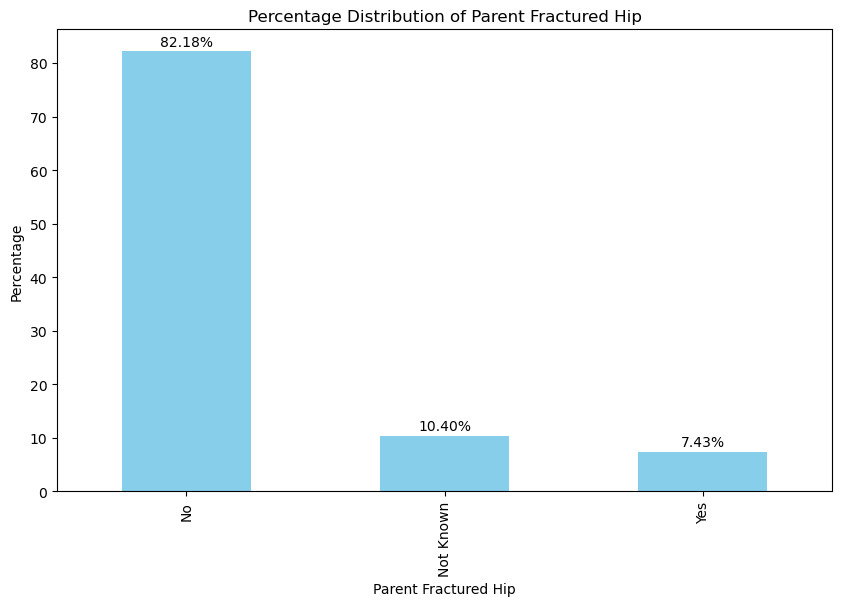

count    202.000000
mean       0.292079
std        0.683011
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        4.000000
Name: parentbreak, dtype: float64

In [31]:
# Variables
column_name = 'parentbreak'
label_name = 'Parent Fractured Hip'
file_name = 'parent_fractured_hip'

# Statistics for the risk factor in filtered dataset for IFR to a txt file
risk_factor_stats = df_filtered[column_name].describe()
risk_factor_stats_str = risk_factor_stats.to_string()
file_path = f'stats/{file_name}_stats.txt'
with open(file_path, 'w') as file:
    file.write(risk_factor_stats_str)

# Mapping values for visualization
mapping = {0: 'No', 1: 'Yes'}
specific_column = f'{column_name}_mapped'
df_filtered[specific_column] = df_filtered[column_name].map(mapping).fillna('Not Known')

# Visualization of the risk factor in filtered dataset for IFR
percentage_values = df_filtered[specific_column].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))

percentage_values.plot(kind='bar', color='skyblue')

plt.xlabel(f'{label_name}')
plt.ylabel('Percentage')
plt.title(f'Percentage Distribution of {label_name}')

for index, value in enumerate(percentage_values):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center', va='bottom')

plt.savefig(f'plots/{file_name}_percentage_distribution.png')

plt.show()

# Dropping column created for visualization
df_filtered = df_filtered.drop(specific_column, axis=1)

risk_factor_stats

#Current Smoking - Risk Factor

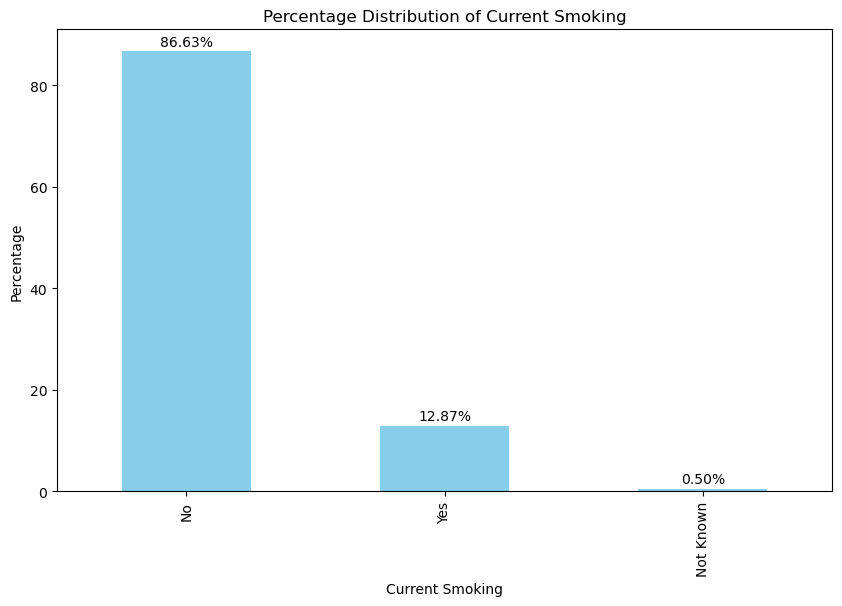

count    202.000000
mean       0.148515
std        0.432191
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        4.000000
Name: smoke, dtype: float64

In [32]:
# Variables
column_name = 'smoke'
label_name = 'Current Smoking'
file_name = 'current_smoking'

# Statistics for the risk factor in filtered dataset for IFR to a txt file
risk_factor_stats = df_filtered[column_name].describe()
risk_factor_stats_str = risk_factor_stats.to_string()
file_path = f'stats/{file_name}_stats.txt'
with open(file_path, 'w') as file:
    file.write(risk_factor_stats_str)

# Mapping values for visualization
mapping = {0: 'No', 1: 'Yes'}
specific_column = f'{column_name}_mapped'
df_filtered[specific_column] = df_filtered[column_name].map(mapping).fillna('Not Known')

# Visualization of the risk factor in filtered dataset for IFR
percentage_values = df_filtered[specific_column].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))

percentage_values.plot(kind='bar', color='skyblue')

plt.xlabel(f'{label_name}')
plt.ylabel('Percentage')
plt.title(f'Percentage Distribution of {label_name}')

for index, value in enumerate(percentage_values):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center', va='bottom')

plt.savefig(f'plots/{file_name}_percentage_distribution.png')

plt.show()

# Dropping column created for visualization
df_filtered = df_filtered.drop(specific_column, axis=1)

risk_factor_stats

#Glucocorticoids - Risk Factor

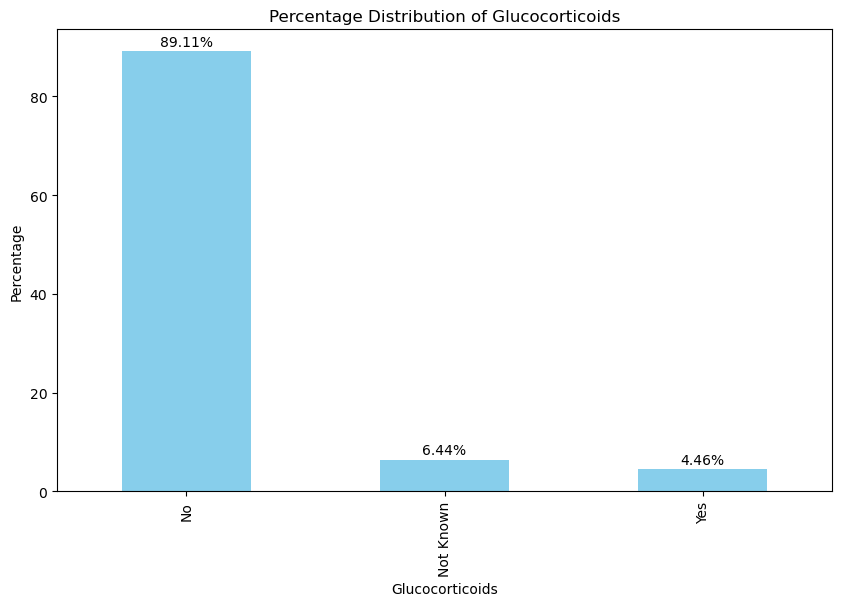

count    202.000000
mean       0.202970
std        0.664218
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        4.000000
Name: oralster, dtype: float64

In [33]:
# Variables
column_name = 'oralster'
label_name = 'Glucocorticoids'
file_name = 'glucocorticoids'

# Statistics for the risk factor in filtered dataset for IFR to a txt file
risk_factor_stats = df_filtered[column_name].describe()
risk_factor_stats_str = risk_factor_stats.to_string()
file_path = f'stats/{file_name}_stats.txt'
with open(file_path, 'w') as file:
    file.write(risk_factor_stats_str)

# Mapping values for visualization
mapping = {0: 'No', 1: 'Yes'}
specific_column = f'{column_name}_mapped'
df_filtered[specific_column] = df_filtered[column_name].map(mapping).fillna('Not Known')

# Visualization of the risk factor in filtered dataset for IFR
percentage_values = df_filtered[specific_column].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))

percentage_values.plot(kind='bar', color='skyblue')

plt.xlabel(f'{label_name}')
plt.ylabel('Percentage')
plt.title(f'Percentage Distribution of {label_name}')

for index, value in enumerate(percentage_values):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center', va='bottom')

plt.savefig(f'plots/{file_name}_percentage_distribution.png')

plt.show()

# Dropping column created for visualization
df_filtered = df_filtered.drop(specific_column, axis=1)

risk_factor_stats

# Rheumatoid Arthritis - Risk Factor

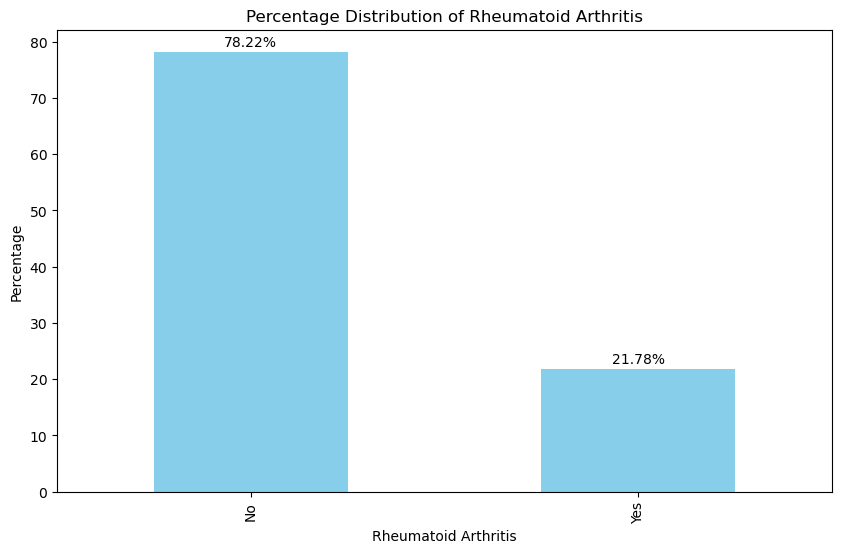

count    44.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: arthritis, dtype: float64

In [34]:
# Variables
column_name = 'arthritis'
label_name = 'Rheumatoid Arthritis'
file_name = 'rheumatoid_arthritis'

# Statistics for the risk factor in filtered dataset for IFR to a txt file
risk_factor_stats = df_filtered[column_name].describe()
risk_factor_stats_str = risk_factor_stats.to_string()
file_path = f'stats/{file_name}_stats.txt'
with open(file_path, 'w') as file:
    file.write(risk_factor_stats_str)

# Mapping values for visualization
mapping = {0: 'No', 1: 'Yes'}
specific_column = f'{column_name}_mapped'
df_filtered[specific_column] = df_filtered[column_name].map(mapping).fillna('No')

# Visualization of the risk factor in filtered dataset for IFR
percentage_values = df_filtered[specific_column].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))

percentage_values.plot(kind='bar', color='skyblue')

plt.xlabel(f'{label_name}')
plt.ylabel('Percentage')
plt.title(f'Percentage Distribution of {label_name}')

for index, value in enumerate(percentage_values):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center', va='bottom')

plt.savefig(f'plots/{file_name}_percentage_distribution.png')

plt.show()

# Dropping column created for visualization
df_filtered = df_filtered.drop(specific_column, axis=1)

risk_factor_stats

# Alcohol - Risk Factor

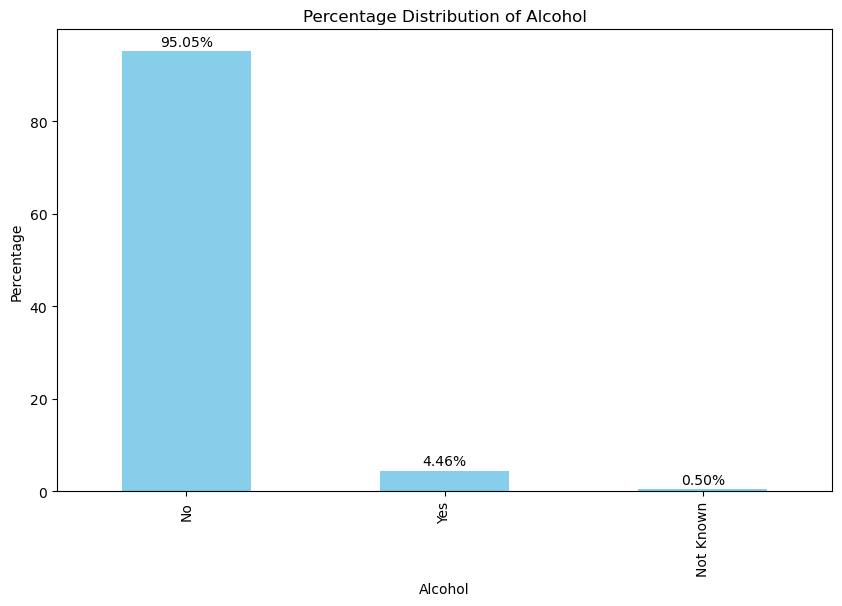

count    202.000000
mean       0.054455
std        0.248388
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        2.000000
Name: alcohol, dtype: float64

In [36]:
# Variables
column_name = 'alcohol'
label_name = 'Alcohol'
file_name = 'alcohol'

# Statistics for the risk factor in filtered dataset for IFR to a txt file
risk_factor_stats = df_filtered[column_name].describe()
risk_factor_stats_str = risk_factor_stats.to_string()
file_path = f'stats/{file_name}_stats.txt'
with open(file_path, 'w') as file:
    file.write(risk_factor_stats_str)

# Mapping values for visualization
mapping = {0: 'No', 1: 'Yes'}
specific_column = f'{column_name}_mapped'
df_filtered[specific_column] = df_filtered[column_name].map(mapping).fillna('Not Known')

# Visualization of the risk factor in filtered dataset for IFR
percentage_values = df_filtered[specific_column].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))

percentage_values.plot(kind='bar', color='skyblue')

plt.xlabel(f'{label_name}')
plt.ylabel('Percentage')
plt.title(f'Percentage Distribution of {label_name}')

for index, value in enumerate(percentage_values):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center', va='bottom')

plt.savefig(f'plots/{file_name}_percentage_distribution.png')

plt.show()

# Dropping column created for visualization
df_filtered = df_filtered.drop(specific_column, axis=1)

risk_factor_stats

# Diabetes - Risk Factor

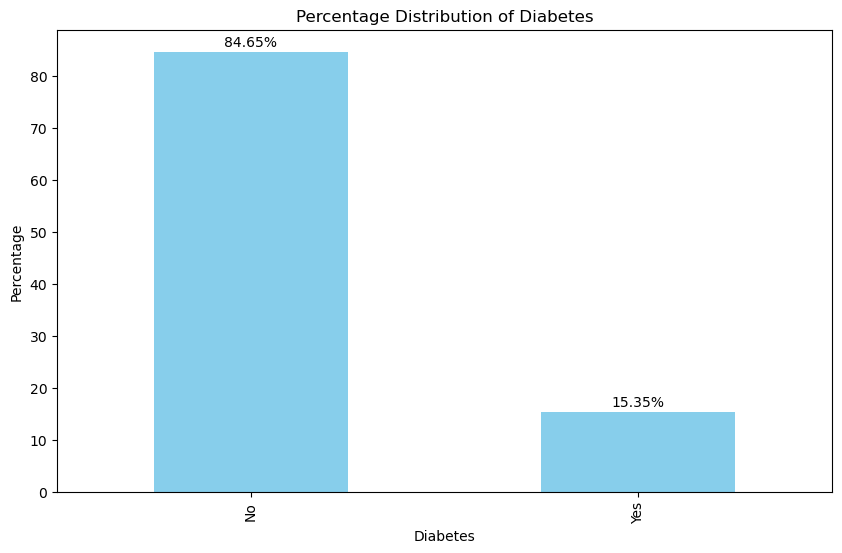

count    31.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: diabetes, dtype: float64

In [37]:
# Variables
column_name = 'diabetes'
label_name = 'Diabetes'
file_name = 'diabetes'

# Statistics for the risk factor in filtered dataset for IFR to a txt file
risk_factor_stats = df_filtered[column_name].describe()
risk_factor_stats_str = risk_factor_stats.to_string()
file_path = f'stats/{file_name}_stats.txt'
with open(file_path, 'w') as file:
    file.write(risk_factor_stats_str)

# Mapping values for visualization
mapping = {0: 'No', 1: 'Yes'}
specific_column = f'{column_name}_mapped'
df_filtered[specific_column] = df_filtered[column_name].map(mapping).fillna('No')

# Visualization of the risk factor in filtered dataset for IFR
percentage_values = df_filtered[specific_column].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))

percentage_values.plot(kind='bar', color='skyblue')

plt.xlabel(f'{label_name}')
plt.ylabel('Percentage')
plt.title(f'Percentage Distribution of {label_name}')

for index, value in enumerate(percentage_values):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center', va='bottom')

plt.savefig(f'plots/{file_name}_percentage_distribution.png')

plt.show()

# Dropping column created for visualization
df_filtered = df_filtered.drop(specific_column, axis=1)

risk_factor_stats

# Respiratory Disease - Risk Factor

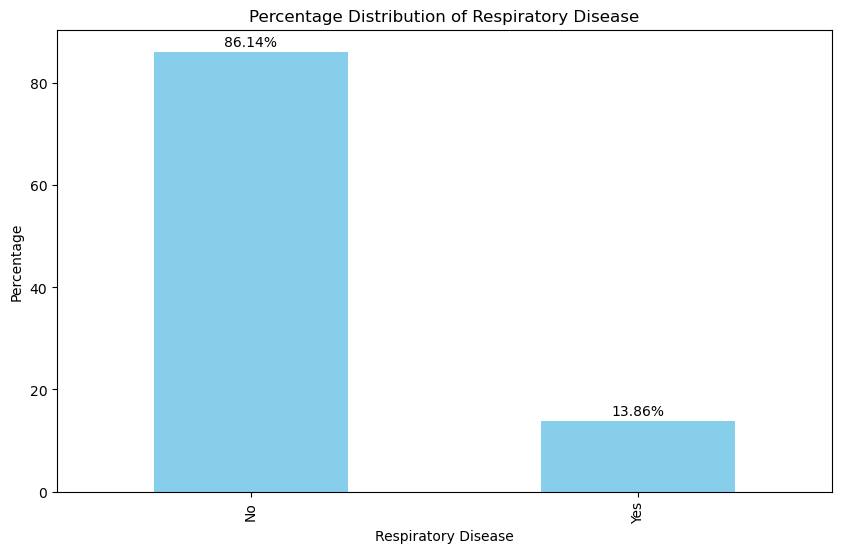

count    28.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: respdisease, dtype: float64

In [38]:
# Variables
column_name = 'respdisease'
label_name = 'Respiratory Disease'
file_name = 'respiratory_disease'

# Statistics for the risk factor in filtered dataset for IFR to a txt file
risk_factor_stats = df_filtered[column_name].describe()
risk_factor_stats_str = risk_factor_stats.to_string()
file_path = f'stats/{file_name}_stats.txt'
with open(file_path, 'w') as file:
    file.write(risk_factor_stats_str)

# Mapping values for visualization
mapping = {0: 'No', 1: 'Yes'}
specific_column = f'{column_name}_mapped'
df_filtered[specific_column] = df_filtered[column_name].map(mapping).fillna('No')

# Visualization of the risk factor in filtered dataset for IFR
percentage_values = df_filtered[specific_column].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))

percentage_values.plot(kind='bar', color='skyblue')

plt.xlabel(f'{label_name}')
plt.ylabel('Percentage')
plt.title(f'Percentage Distribution of {label_name}')

for index, value in enumerate(percentage_values):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center', va='bottom')

plt.savefig(f'plots/{file_name}_percentage_distribution.png')

plt.show()

# Dropping column created for visualization
df_filtered = df_filtered.drop(specific_column, axis=1)

risk_factor_stats

#Cancer - Risk Factor

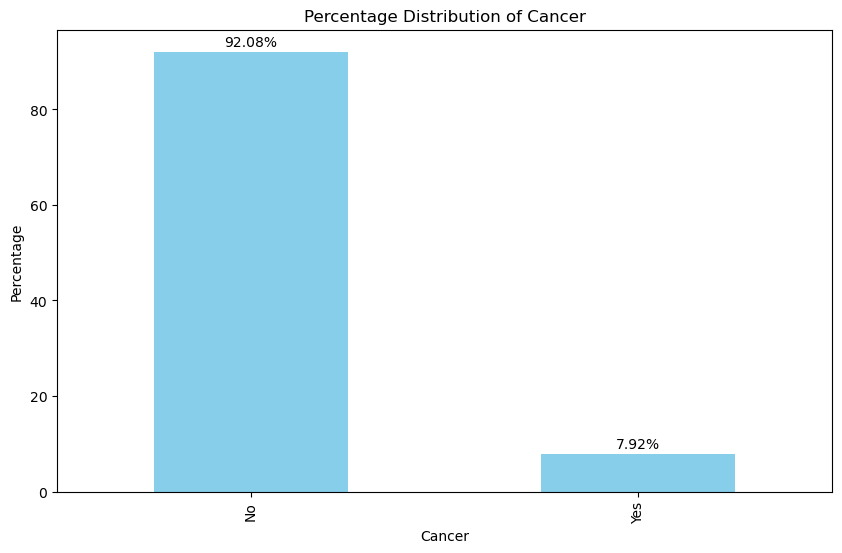

count    16.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: cancer, dtype: float64

In [39]:
# Variables
column_name = 'cancer'
label_name = 'Cancer'
file_name = 'cancer'

# Statistics for the risk factor in filtered dataset for IFR to a txt file
risk_factor_stats = df_filtered[column_name].describe()
risk_factor_stats_str = risk_factor_stats.to_string()
file_path = f'stats/{file_name}_stats.txt'
with open(file_path, 'w') as file:
    file.write(risk_factor_stats_str)

# Mapping values for visualization
mapping = {0: 'No', 1: 'Yes'}
specific_column = f'{column_name}_mapped'
df_filtered[specific_column] = df_filtered[column_name].map(mapping).fillna('No')

# Visualization of the risk factor in filtered dataset for IFR
percentage_values = df_filtered[specific_column].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))

percentage_values.plot(kind='bar', color='skyblue')

plt.xlabel(f'{label_name}')
plt.ylabel('Percentage')
plt.title(f'Percentage Distribution of {label_name}')

for index, value in enumerate(percentage_values):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center', va='bottom')

plt.savefig(f'plots/{file_name}_percentage_distribution.png')

plt.show()

# Dropping column created for visualization
df_filtered = df_filtered.drop(specific_column, axis=1)

risk_factor_stats

# Distribution of Patient Age at First Fracture

In [40]:
obreak_date = pd.to_datetime(df_filtered['obreak_date'])
date_surveyed = pd.to_datetime(df_filtered['DateSurveyed'])
patient_age = df_filtered['PatientAge']

df_filtered['AgeAtObreak'] = (obreak_date - date_surveyed).dt.days / 365 + patient_age
age_at_obreak = df_filtered['AgeAtObreak']

df_filtered = df_filtered[(age_at_obreak >= 40) & (age_at_obreak <= patient_age.max())]

/var/folders/4c/gh2b2b651rddfwcxbp9zl5xc0000gv/T/ipykernel_67245/2668129447.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  obreak_date = pd.to_datetime(df_filtered['obreak_date'])
/var/folders/4c/gh2b2b651rddfwcxbp9zl5xc0000gv/T/ipykernel_67245/2668129447.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_surveyed = pd.to_datetime(df_filtered['DateSurveyed'])


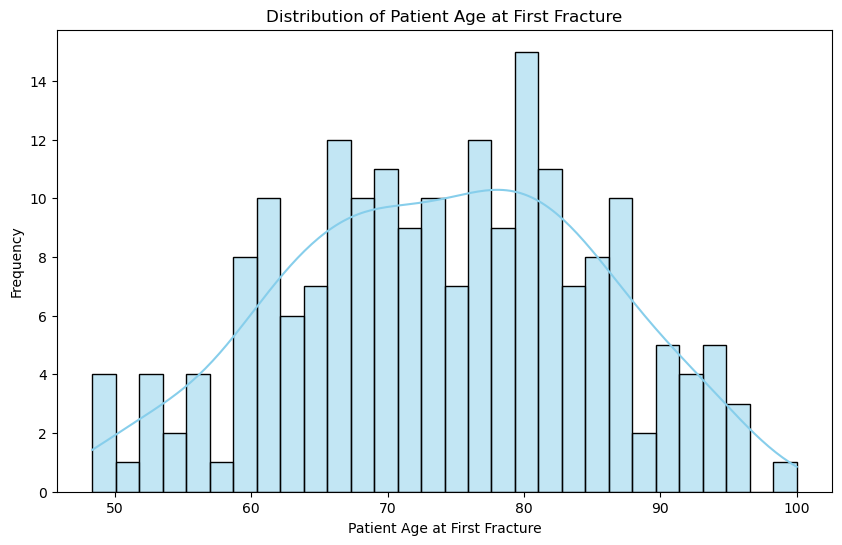

count    198.000000
mean      74.001896
std       11.292500
min       48.331507
25%       66.043151
50%       74.195890
75%       82.360274
max      100.000000
Name: AgeAtObreak, dtype: float64

In [41]:
# Variables
column_name = 'AgeAtObreak'
label_name = 'Patient Age at First Fracture'
file_name = 'age_at_first_fracture'

# Statistics for the risk factor in filtered dataset for IFR to a txt file
risk_factor_stats = df_filtered[column_name].describe()
risk_factor_stats_str = risk_factor_stats.to_string()
file_path = f'stats/{file_name}_stats.txt'
with open(file_path, 'w') as file:
    file.write(risk_factor_stats_str)


# Visualization of Age risk factor in filtered dataset for IFR
plt.figure(figsize=(10, 6))

sns.histplot(df_filtered[column_name], bins=30, kde=True, color='skyblue', edgecolor='black')

plt.xlabel(label_name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {label_name}')

plt.savefig(f'plots/{file_name}_distribution.png')

plt.show()

risk_factor_stats

# Distribution of Days between Fractures

In [42]:
datebone = pd.to_datetime(df_filtered['datebone'])

df_filtered['DaysBtwFracs'] = (datebone - obreak_date).dt.days
days_btw_fracs = df_filtered['DaysBtwFracs']

df_filtered_clean = df_filtered[(days_btw_fracs >= 0) & (days_btw_fracs <= 730)]

/var/folders/4c/gh2b2b651rddfwcxbp9zl5xc0000gv/T/ipykernel_67245/3733507618.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datebone = pd.to_datetime(df_filtered['datebone'])


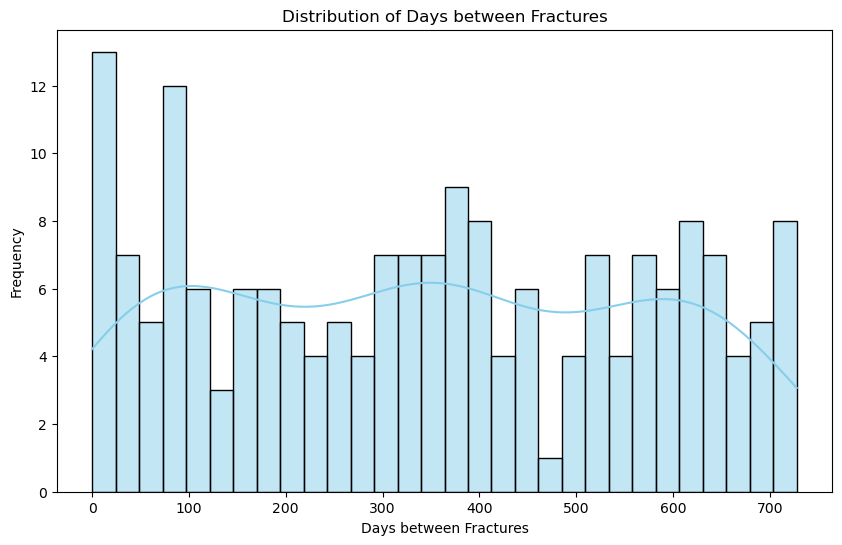

count    185.000000
mean     345.659459
std      222.784010
min        0.000000
25%      148.000000
50%      347.000000
75%      553.000000
max      728.000000
Name: DaysBtwFracs, dtype: float64

In [43]:
# Variables
column_name = 'DaysBtwFracs'
label_name = 'Days between Fractures'
file_name = 'days_between_fractures'

# Statistics for the risk factor in filtered dataset for IFR to a txt file
risk_factor_stats = df_filtered_clean[column_name].describe()
risk_factor_stats_str = risk_factor_stats.to_string()
file_path = f'stats/{file_name}_stats.txt'
with open(file_path, 'w') as file:
    file.write(risk_factor_stats_str)
risk_factor_stats

# Visualization of the risk factor in filtered dataset for IFR
plt.figure(figsize=(10, 6))

sns.histplot(df_filtered_clean[column_name], bins=30, kde=True, color='skyblue', edgecolor='black')

plt.xlabel(label_name)
plt.ylabel('Frequency')
plt.title(f'Distribution of {label_name}')

plt.savefig(f'plots/{file_name}_distribution.png')

plt.show()

risk_factor_stats

# Percentage Distribution of First Fracture Types

In [44]:
df_obreaks = df_filtered[['obreaK_wrist',
                          'obreak_elbow',
                          'obreak_shoulder',
                          'obreak_spine',
                          'obreak_pelvis',
                          'obreak_hip',
                          'obreak_femur',
                          'obreak_tibfib',
                          'obreak_clavicle',
                          'obreak_obone']]

obreak_types_distribution = df_obreaks.apply(lambda col: col.value_counts(dropna=True)).T

obreak_types_percentage = obreak_types_distribution.div(obreak_types_distribution.sum(axis=0)) * 100

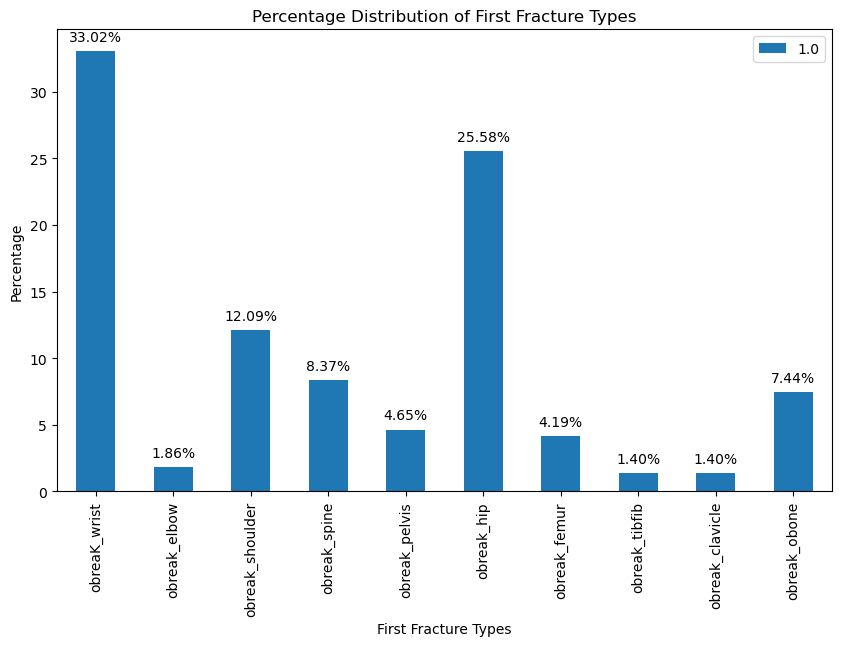

,1.0
obreaK_wrist,71
obreak_elbow,4
obreak_shoulder,26
obreak_spine,18
obreak_pelvis,10
obreak_hip,55
obreak_femur,9
obreak_tibfib,3
obreak_clavicle,3
obreak_obone,16


In [50]:
# Statistics for the risk factor in filtered dataset for IFR to a txt file
risk_factor_stats = obreak_types_distribution
risk_factor_stats_str = risk_factor_stats.to_string()
file_path = 'stats/first_fracture_types_stats.txt'
with open(file_path, 'w') as file:
    file.write(risk_factor_stats_str)

# Plotting
ax = obreak_types_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_ylabel('Percentage')
ax.set_xlabel('First Fracture Types')
ax.set_title('Percentage Distribution of First Fracture Types')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.savefig(f'plots/first_fracture_types_distribution.png')

plt.show()
obreak_types_distribution

#Summary and Conclusion